## Linear Regression Assignment
- Balakrishna Gadiyar
- 21 Jan 2019

## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 


## Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

 
## Data Preparation

    There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

 

## Model Evaluation:

    When you're done with model building and residual analysis, and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.
     

    from sklearn.metrics import r2_score
    r2_score(y_test, y_pred)

        where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.


    Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

In [2240]:
# Import Data analysis,excel reading and visualization related packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlrd

In [2241]:
#Importing car price dataset. 
#Assumption would be car price assignment file is available in the same folder as this python file

car_price = pd.read_csv('CarPrice_Assignment.csv')

# media = media.drop('Unnamed: 7',axis = 1)

### Data Dictionary For Reference 

Car_ID --->  Unique id of each observation (Interger)

Symboling 	--->	Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

carCompany --->	Name of car company (Categorical)

fueltype  ---> Car fuel type i.e gas or diesel (Categorical)

aspiration	---> Aspiration used in a car (Categorical)

doornumber	---> Number of doors in a car (Categorical)

carbody	---> body of car (Categorical)

drivewheel	---> type of drive wheel (Categorical)

enginelocation	---> Location of car engine (Categorical)

wheelbase --->	Weelbase of car (Numeric)

carlength --->	Length of car (Numeric)

carwidth --->	Width of car (Numeric)

carheight --->	height of car (Numeric)

curbweight --->	The weight of a car without occupants or baggage. (Numeric)

enginetype	---> Type of engine. (Categorical)

cylindernumber	---> cylinder placed in the car (Categorical)

enginesize ---> Size of car (Numeric)

fuelsystem --->	Fuel system of car (Categorical)

boreratio ---> Boreratio of car (Numeric)

stroke --->	Stroke or volume inside the engine (Numeric)

compressionratio --> compression ratio of car (Numeric)

horsepower ---> Horsepower (Numeric)

peakrpm -----> car peak rpm (Numeric)

citympg	---> Mileage in city (Numeric)

highwaympg --->	Mileage on highway (Numeric)

price(Dependent variable) --> Price of car (Numeric)


In [2242]:
#Observe for trends - Let us review top rows from the car price data frame
car_price.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [2243]:
# Identify the shape of the dataframe
car_price.info()
#We observe not null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [2244]:
#Describing the data frame
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [2245]:
#Describing the shape of the dataframe
car_price.shape

(205, 26)

In [2246]:
#Identify columns with null items in dataframe
car_price.isnull().sum(axis=0)
#There are no null values in the column.

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [2247]:
#Identify rows with null items in dataframe
car_price.isnull().sum(axis=1)
#There are no null values in the column.

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    0
200    0
201    0
202    0
203    0
204    0
Length: 205, dtype: int64

## Data Visualization

Visualizing the data and understanding the trend to start with

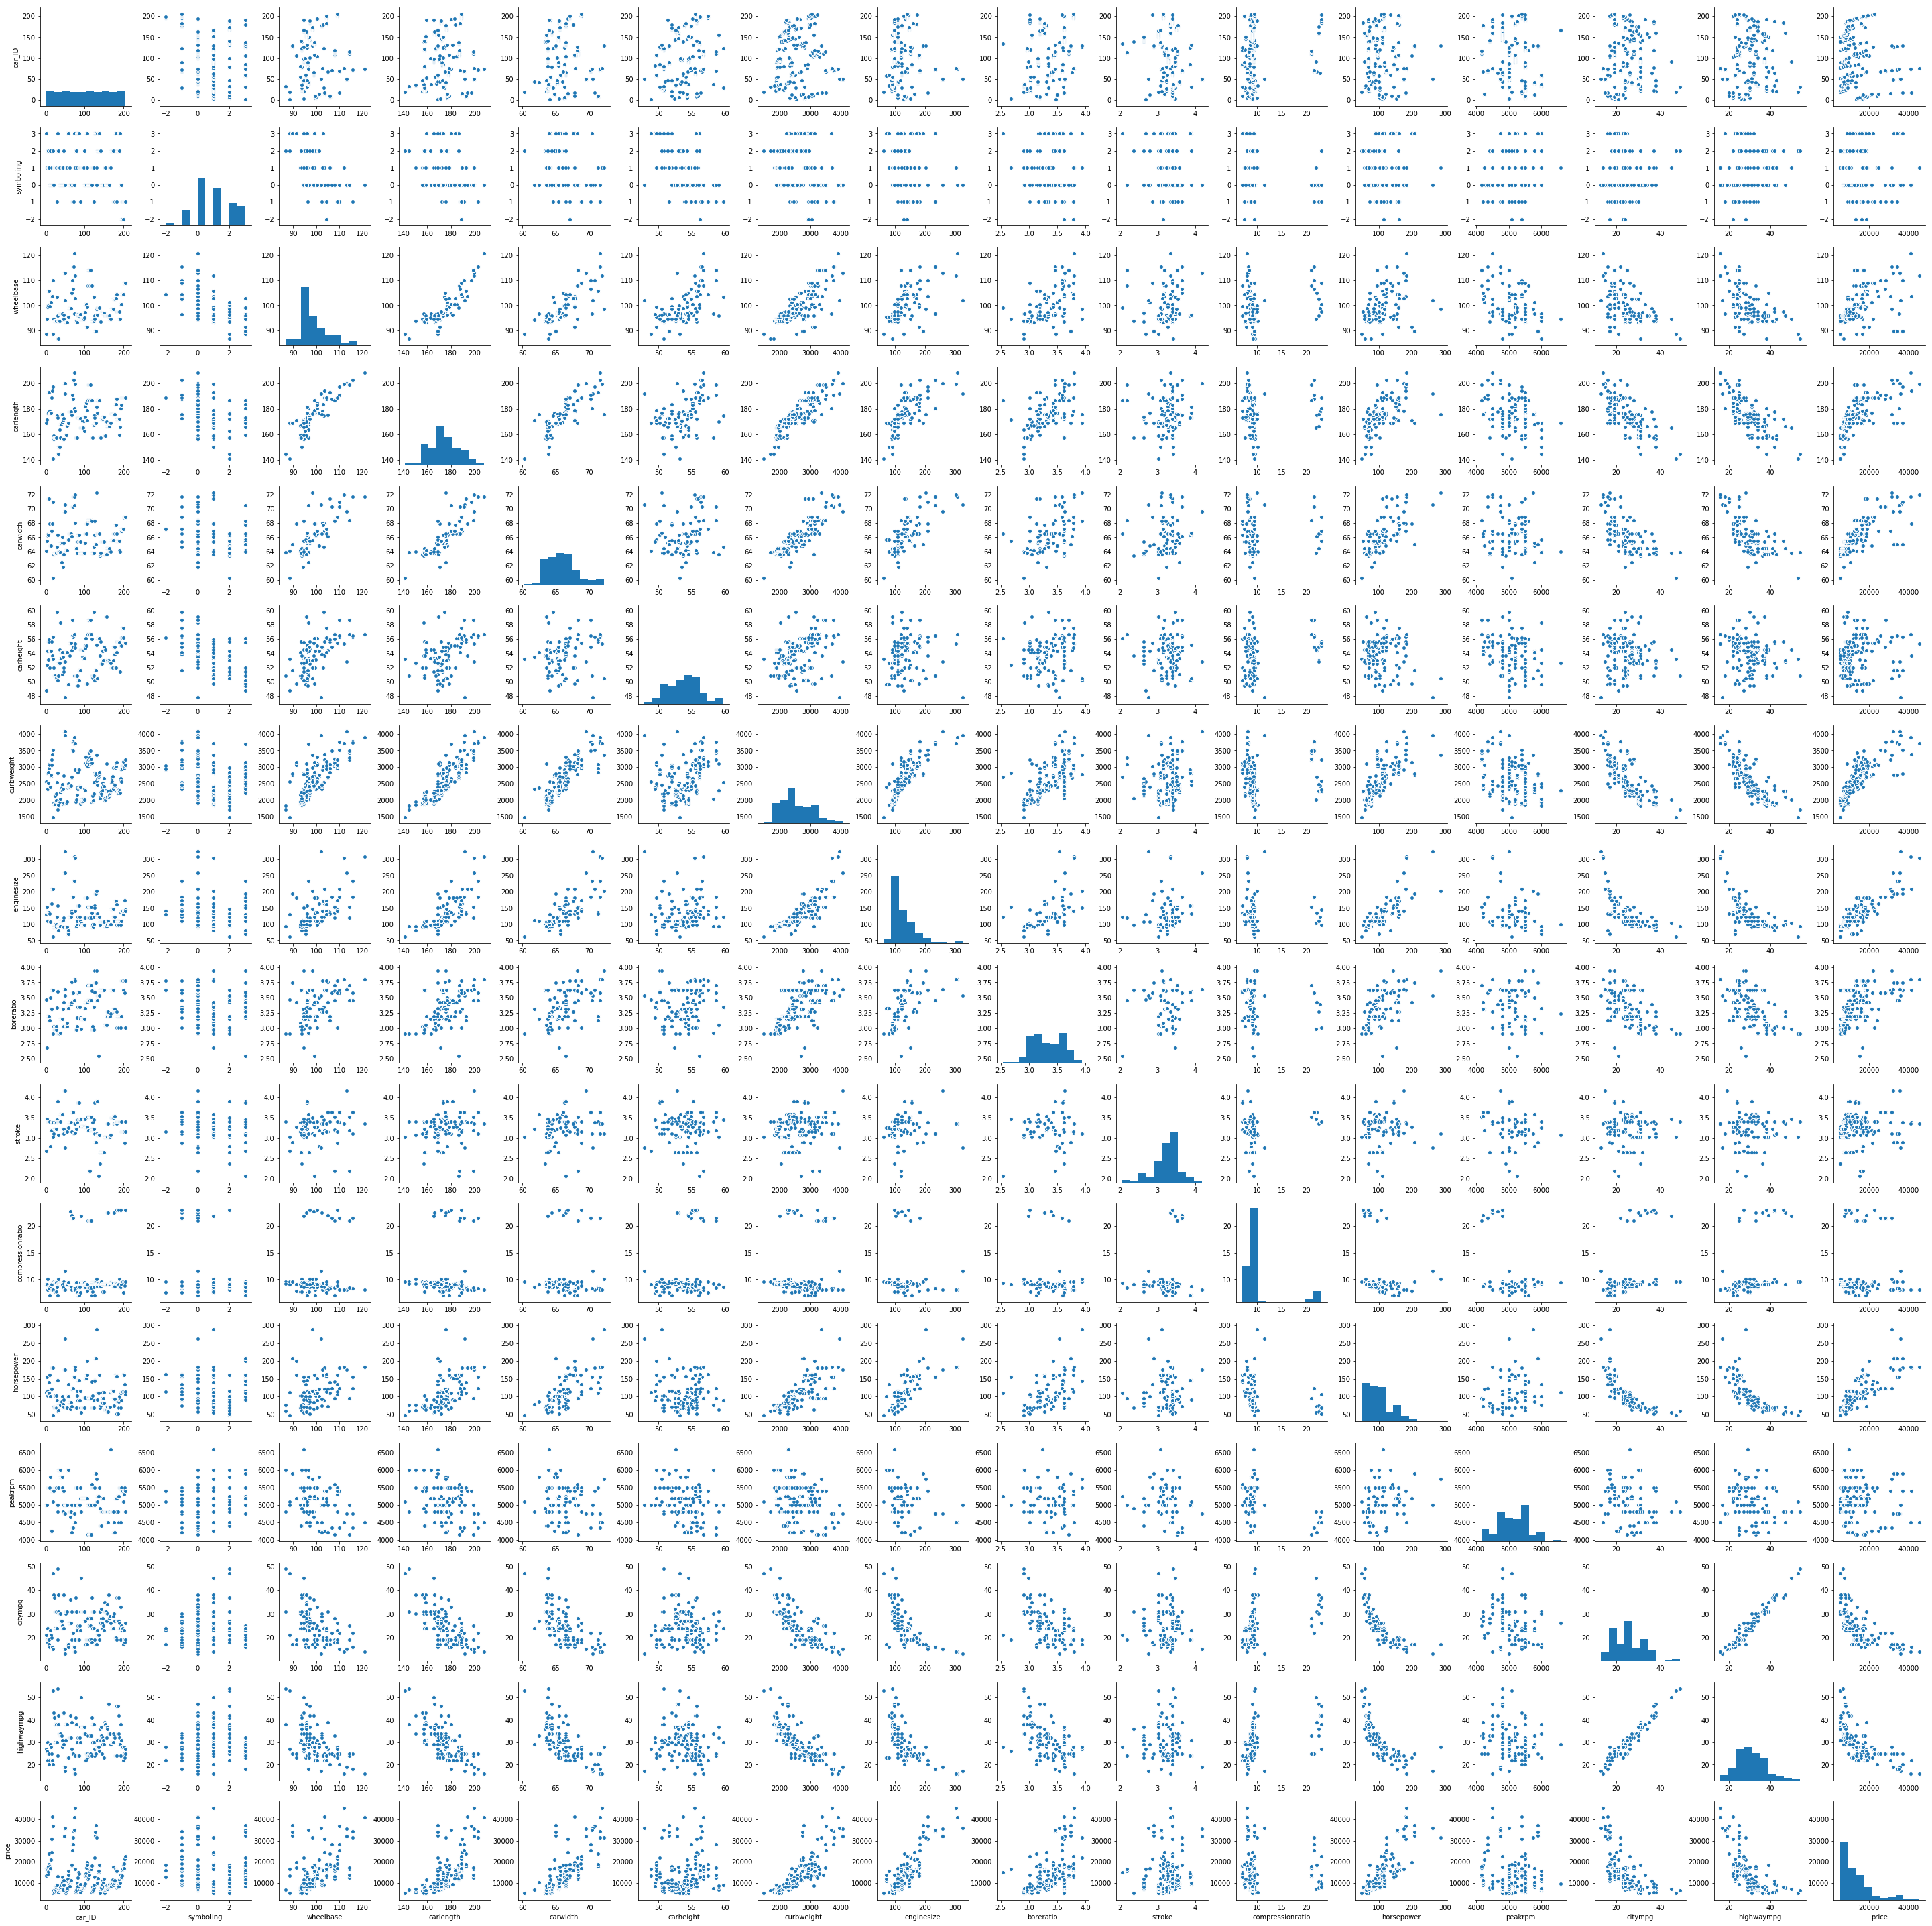

In [2248]:
#Visualize the dataframe to identify any patters
sns.pairplot(car_price)
plt.show()

In [2249]:
#Backing up the dataframe before modifying initial structure
car_price_bk=car_price

## Data Analysis and Preparatory Work

Below steps focus on data analysis and cleanup

In [2250]:
#Data Preparation- Step1 - Setting Car_Id as index. This would remove one column from analysis.
car_price.set_index('car_ID', inplace=True)
car_price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2251]:
#Data Preparation- Step2 - check if we have duplicate entries and drop them
pd.concat(rows for _, rows in car_price.groupby("CarName") if len(rows) > 1).head(20)
#Cannot figure out any duplicate entries.

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.400,8.0,115,5500,18,22,17450.0
7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.400,8.5,110,5500,19,25,17710.0
11,2,bmw 320i,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.800,8.8,101,5800,23,29,16430.0
12,0,bmw 320i,gas,std,four,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.800,8.8,101,5800,23,29,16925.0
14,0,bmw x3,gas,std,four,sedan,rwd,front,101.2,176.8,...,164,mpfi,3.31,3.190,9.0,121,4250,21,28,21105.0
18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.390,8.0,182,5400,15,20,36880.0
38,0,honda accord,gas,std,two,hatchback,fwd,front,96.5,167.5,...,110,1bbl,3.15,3.580,9.0,86,5800,27,33,7895.0
41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,175.4,...,110,1bbl,3.15,3.580,9.0,86,5800,27,33,10295.0
31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,144.6,...,92,1bbl,2.91,3.410,9.6,58,4800,49,54,6479.0


In [2252]:
#Data Preparation -Step 3- As per the requirement stateded, extracting car company name from CarName
company=car_price["CarName"].str.split(" ", n = 1,expand=True)
#New company frame will have multiple entities post split, attach only first from the list.
car_price['Company']=company[0].str.upper()
#car_price['Model']=company[1].str.upper()
#Drop CarName column post split
car_price.drop(['CarName'], axis = 1, inplace = True)
car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI


In [2253]:
#Data Preparation - Step4-Valdiate company name column
car_price.Company.unique()
#There are data entry problems, this needs correcion

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [2254]:
#Data Preparation - Step 5- Correcting data in Company and Model columns
#Identified are - MAXDA with MAZDA, PORCSHCE with PORSCHE,  TOYOUTA with TOYOTA, VOKSWAGEN for VOKSWAGEN and VW
#Research on internet brings in correction to alfa-romero as well.
car_price['Company'] = car_price['Company'].replace('MAXDA','MAZDA')
car_price['Company'] = car_price['Company'].replace('PORCSHCE','PORSCHE')
car_price['Company'] = car_price['Company'].replace('ALFA-ROMERO','ALFA-ROMEO')
car_price['Company'] = car_price['Company'].replace('TOYOUTA','TOYOTA')
car_price['Company'] = car_price['Company'].replace('VOKSWAGEN','VOLKSWAGEN')
car_price['Company'] = car_price['Company'].replace('VW','VOLKSWAGEN')
#car_price['Model'] = car_price['Model'].replace('100 LS','100LS')
car_price.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMEO
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMEO
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMEO
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI


In [2255]:
#Data Preparation- Step5b -Valdiate company name column
#car_price.Model.unique()
#There are data entry problems, this needs correcion

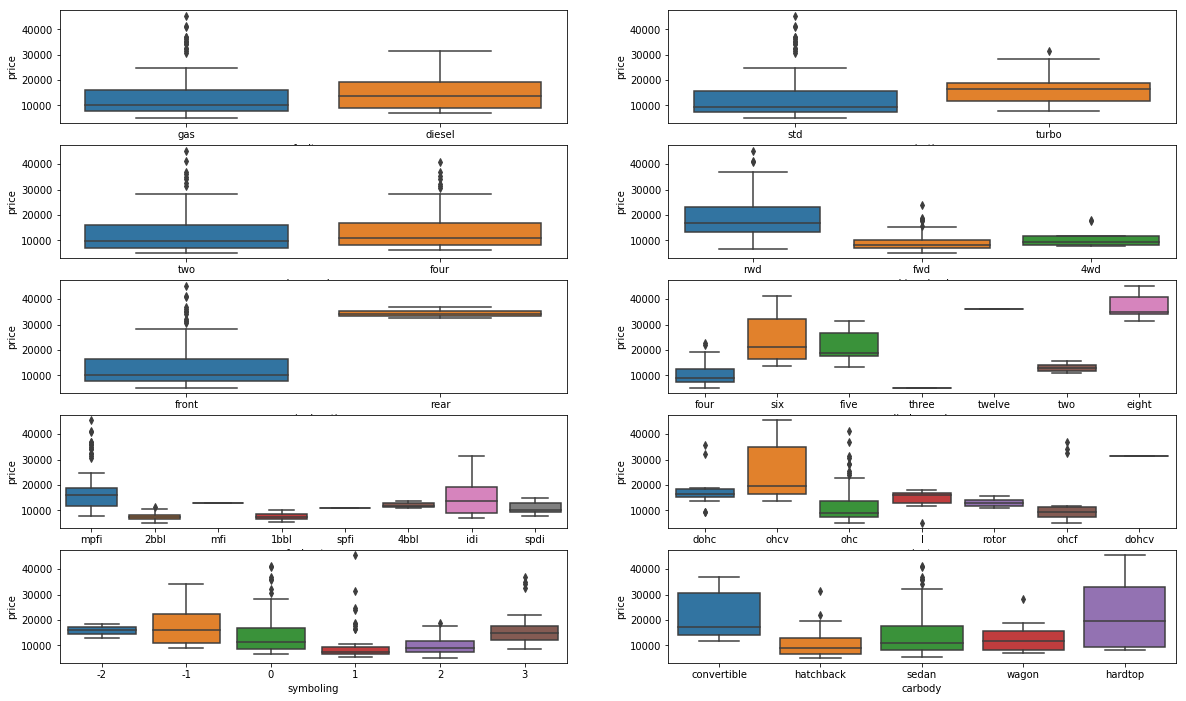

In [2256]:
#Data Visualize - Step 6- using boxplot for newly made columns
plt.figure(figsize=(20, 12))
plt.subplot(5,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price)
plt.subplot(5,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price)
plt.subplot(5,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price)
plt.subplot(5,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price)
plt.subplot(5,2,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price)
plt.subplot(5,2,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price)
plt.subplot(5,2,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price)
plt.subplot(5,2,8)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price)
plt.subplot(5,2,9)
sns.boxplot(x = 'symboling', y = 'price', data = car_price)
plt.subplot(5,2,10)
sns.boxplot(x = 'carbody', y = 'price', data = car_price)
plt.show()

# Outcomes of visual analysis-
# 1. Diesel vehicles are costlier than gas
# 2. Turbo engines costs more than standard 
# 3. Rear wheel drive costs more than four wheel and frontwheel - can be one driving variable
# 4. Rear engine location makes car cost higher - engine location can factor
# 5. Eight cylinders costs more - number of cylinders can drive cost
# 6. Cars with -2, -1 are having higher cost - Insurance rating can be one factor to predict
# 7. Hard top and convertible have varieties in all price ranges, most hatchbacks fall in lower price range.


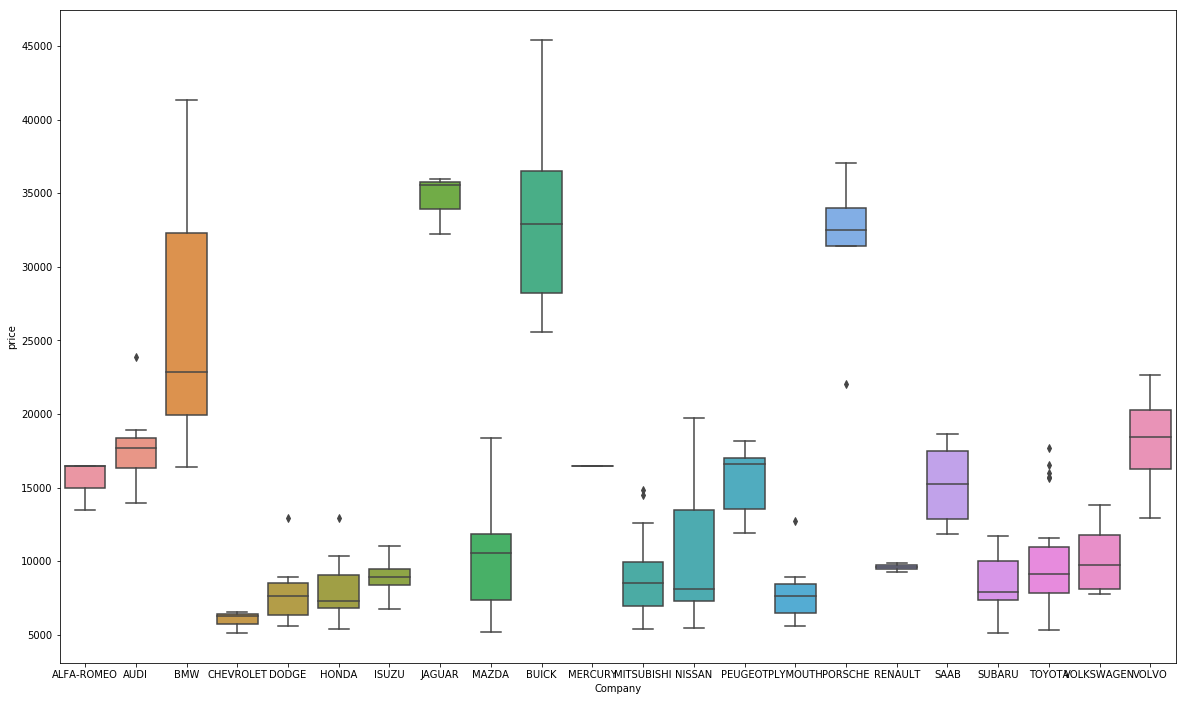

In [2257]:
#Data Visualize - Step 7- using boxplot based on company column
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'Company', y = 'price', data = car_price)
plt.show()

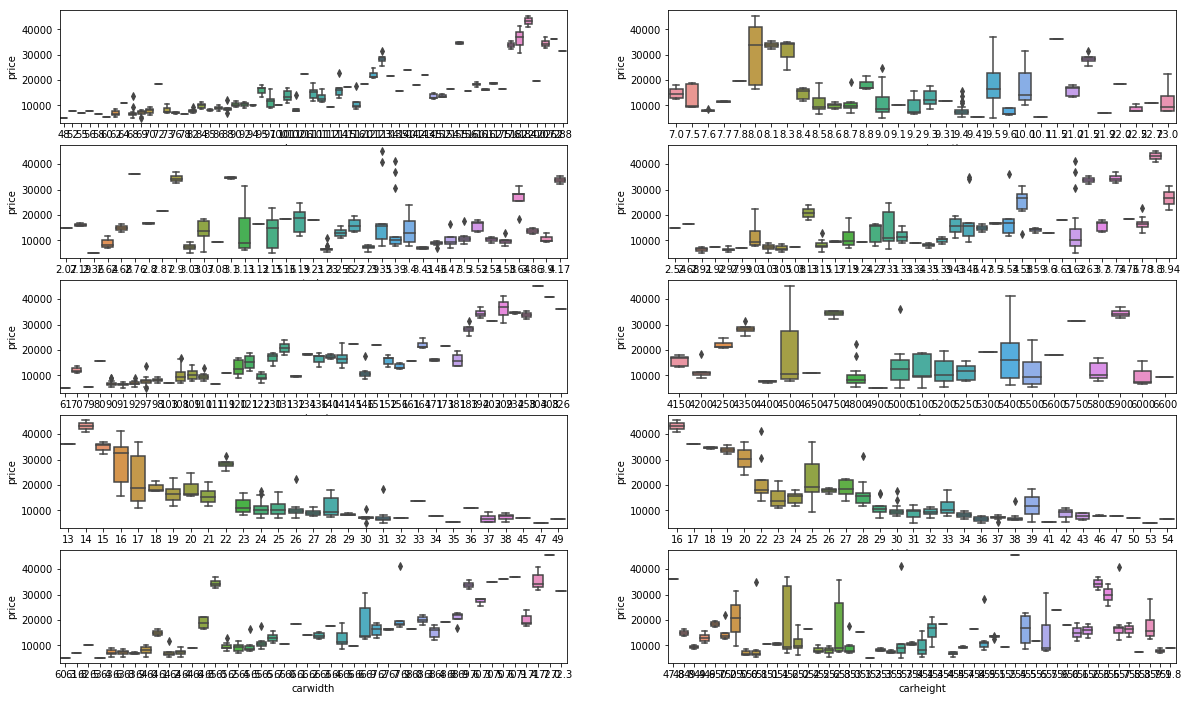

In [2258]:
#Data Visualize - Step8- using boxplot for non categoric columns
plt.figure(figsize=(20, 12))
plt.subplot(5,2,1)
sns.boxplot(x = 'horsepower', y = 'price', data = car_price)
plt.subplot(5,2,2)
sns.boxplot(x = 'compressionratio', y = 'price', data = car_price)
plt.subplot(5,2,3)
sns.boxplot(x = 'stroke', y = 'price', data = car_price)
plt.subplot(5,2,4)
sns.boxplot(x = 'boreratio', y = 'price', data = car_price)
plt.subplot(5,2,5)
sns.boxplot(x = 'enginesize', y = 'price', data = car_price)
plt.subplot(5,2,6)
sns.boxplot(x = 'peakrpm', y = 'price', data = car_price)
plt.subplot(5,2,7)
sns.boxplot(x = 'citympg', y = 'price', data = car_price)
plt.subplot(5,2,8)
sns.boxplot(x = 'highwaympg', y = 'price', data = car_price)
plt.subplot(5,2,9)
sns.boxplot(x = 'carwidth', y = 'price', data = car_price)
plt.subplot(5,2,10)
sns.boxplot(x = 'carheight', y = 'price', data = car_price)
plt.show()


In [2259]:
#Data preparation Step9 - Convert categoric columns to logical values
# Defining a common maping function for all logical(with two values) columns
# When I started building the model, symbolic rating values throwing errors, hence trying to change the string values instead of numbers.
def mapmydata(value):
    return value.map({'gas': 0, "diesel": 1,'std': 0, "turbo": 1,'two': 0, "four": 1,'front': 0, "rear": 1, -3:'Rating-3', -2:"Rating-2", -1:"Rating-1", 0:"Rating-0", 1:"Rating+1", 2:"Rating+2", 3:"Rating+3"})
#Creating different map function for symbolic
def mapmysymbolicdata(values):
    return values.map({-3:'Rating-3', -2:"Rating-2", -1:"Rating-1", 0:"Rating+0", 1:"Rating+1", 2:"Rating+2", 3:"Rating+3"})

#Applying the functions on different columns
car_price[['fueltype']]=car_price[['fueltype']].apply(mapmydata)
car_price[['aspiration']]=car_price[['aspiration']].apply(mapmydata)
car_price[['doornumber']]=car_price[['doornumber']].apply(mapmydata)
car_price[['enginelocation']]=car_price[['enginelocation']].apply(mapmydata)
car_price[['symboling']]=car_price[['symboling']].apply(mapmysymbolicdata)
     
#validating the results
car_price.head(10)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
car_ID,,,,,,,,,,,,,,,,,,,,,
1,Rating+3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,ALFA-ROMEO
2,Rating+3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,ALFA-ROMEO
3,Rating+1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,ALFA-ROMEO
4,Rating+2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,AUDI
5,Rating+2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,AUDI
6,Rating+2,0,0,0,sedan,fwd,0,99.8,177.3,66.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,AUDI
7,Rating+1,0,0,1,sedan,fwd,0,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,AUDI
8,Rating+1,0,0,1,wagon,fwd,0,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,AUDI
9,Rating+1,0,1,1,sedan,fwd,0,105.8,192.7,71.4,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,AUDI


In [2260]:
#Data preparation Step10 - To focus on columns with more than 2 values needs dummy variable concepts
#Step2 - Convert carbody to columns based on dummy variables method
carbody_values = pd.get_dummies(car_price['carbody'])
carbody_values.head()


,convertible,hardtop,hatchback,sedan,wagon
car_ID,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0
5,0,0,0,1,0


In [2261]:
#Univariate analysis - Step 11 - Checking count of cars with different body types.
car_price.groupby('carbody').describe()
#We see that convertible has least and can be dropped while mapping dummy variables.

aspiration                                              boreratio  \
                 count      mean       std  min  25%  50%  75%  max     count   
carbody                                                                         
convertible        6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0       6.0   
hardtop            8.0  0.125000  0.353553  0.0  0.0  0.0  0.0  1.0       8.0   
hatchback         70.0  0.185714  0.391684  0.0  0.0  0.0  0.0  1.0      70.0   
sedan             96.0  0.187500  0.392361  0.0  0.0  0.0  0.0  1.0      96.0   
wagon             25.0  0.200000  0.408248  0.0  0.0  0.0  0.0  1.0      25.0   

                       ...   stroke       wheelbase                        \
                 mean  ...      75%   max     count        mean       std   
carbody                ...                                                  
convertible  3.491667  ...    3.325  3.50       6.0   92.700000  4.354308   
hardtop      3.608750  ...    3.500  3.64       8.0   98.500000  7.774317   
hatchback    3.244571  ...    3.410  3.90      70.0   95.535714  3.228094   
sedan        3.338542  ...    3.400  4.17      96.0  100.619792  6.060287   
wagon        3.406400  ...    3.410  3.90      25.0  102.156000  6.777603   

                                                   
              min     25%     50%      75%    max  
carbody                                            
convertible  88.6  88.825   92.00   96.075   98.4  
hardtop      89.5  93.700   98.40  100.475  112.0  
hatchback    86.6  93.700   95.30   96.500  102.9  
sedan        93.1  96.300   98.95  104.350  120.9  
wagon        94.5  96.500  100.40  104.500  114.2  

[5 rows x 144 columns]

In [2262]:
#Data Preparation - Step 12-dropping first column and add results to original dataframe
carbody_values = pd.get_dummies(car_price['carbody'], drop_first = True)
car_price = pd.concat([car_price, carbody_values], axis = 1)
#dropping the aspiration column
car_price.drop(['carbody'], axis = 1, inplace = True)
#visualize the dataframe
car_price.head(10)

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,horsepower,peakrpm,citympg,highwaympg,price,Company,hardtop,hatchback,sedan,wagon
car_ID,,,,,,,,,,,,,,,,,,,,,
1,Rating+3,0,0,0,rwd,0,88.6,168.8,64.1,48.8,...,111,5000,21,27,13495.000,ALFA-ROMEO,0,0,0,0
2,Rating+3,0,0,0,rwd,0,88.6,168.8,64.1,48.8,...,111,5000,21,27,16500.000,ALFA-ROMEO,0,0,0,0
3,Rating+1,0,0,0,rwd,0,94.5,171.2,65.5,52.4,...,154,5000,19,26,16500.000,ALFA-ROMEO,0,1,0,0
4,Rating+2,0,0,1,fwd,0,99.8,176.6,66.2,54.3,...,102,5500,24,30,13950.000,AUDI,0,0,1,0
5,Rating+2,0,0,1,4wd,0,99.4,176.6,66.4,54.3,...,115,5500,18,22,17450.000,AUDI,0,0,1,0
6,Rating+2,0,0,0,fwd,0,99.8,177.3,66.3,53.1,...,110,5500,19,25,15250.000,AUDI,0,0,1,0
7,Rating+1,0,0,1,fwd,0,105.8,192.7,71.4,55.7,...,110,5500,19,25,17710.000,AUDI,0,0,1,0
8,Rating+1,0,0,1,fwd,0,105.8,192.7,71.4,55.7,...,110,5500,19,25,18920.000,AUDI,0,0,0,1
9,Rating+1,0,1,1,fwd,0,105.8,192.7,71.4,55.9,...,140,5500,17,20,23875.000,AUDI,0,0,1,0


In [2263]:
#Data preparation Step13 - To focus on columns with more than 2 values needs dummy variable concepts
#Step2 - Convert drivewheel to columns based on dummy variables method
drivewheel_values = pd.get_dummies(car_price['drivewheel'])
drivewheel_values.head()

,4wd,fwd,rwd
car_ID,,,
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,1,0,0


In [2264]:
#Univariate analysis - Step 14 - Checking count of cars with different drivewheel types.
car_price.groupby('drivewheel').describe()
#We see that convertible has least and can be dropped while mapping dummy variables.

aspiration                                             boreratio  \
                count      mean      std  min  25%  50%  75%  max     count   
drivewheel                                                                    
4wd               9.0  0.333333  0.50000  0.0  0.0  0.0  1.0  1.0       9.0   
fwd             120.0  0.133333  0.34136  0.0  0.0  0.0  0.0  1.0     120.0   
rwd              76.0  0.236842  0.42797  0.0  0.0  0.0  0.0  1.0      76.0   

                      ...   wagon      wheelbase                              \
                mean  ...     75%  max     count        mean       std   min   
drivewheel            ...                                                      
4wd         3.391111  ...     1.0  1.0       9.0   96.822222  1.897879  93.3   
fwd         3.197167  ...     0.0  1.0     120.0   96.429167  3.276666  86.6   
rwd         3.531842  ...     0.0  1.0      76.0  102.660526  7.526789  88.6   

                                           
               25%    50%      75%    max  
drivewheel                                 
4wd         95.700   96.9   97.000   99.5  
fwd         94.500   96.0   97.675  105.8  
rwd         95.975  103.5  107.925  120.9  

[3 rows x 176 columns]

In [2265]:
#Data Preparation- Step14 -dropping first column and add results to original dataframe
drivewheel_values = pd.get_dummies(car_price['drivewheel'], drop_first = True)
car_price = pd.concat([car_price, drivewheel_values], axis = 1)
#dropping the drivewheel column
car_price.drop(['drivewheel'], axis = 1, inplace = True)
#visualize the dataframe
car_price.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,citympg,highwaympg,price,Company,hardtop,hatchback,sedan,wagon,fwd,rwd
car_ID,,,,,,,,,,,,,,,,,,,,,
1,Rating+3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,21,27,13495.000,ALFA-ROMEO,0,0,0,0,0,1
2,Rating+3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,21,27,16500.000,ALFA-ROMEO,0,0,0,0,0,1
3,Rating+1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,19,26,16500.000,ALFA-ROMEO,0,1,0,0,0,1
4,Rating+2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,24,30,13950.000,AUDI,0,0,1,0,1,0
5,Rating+2,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,18,22,17450.000,AUDI,0,0,1,0,0,0
6,Rating+2,0,0,0,0,99.8,177.3,66.3,53.1,2507,...,19,25,15250.000,AUDI,0,0,1,0,1,0
7,Rating+1,0,0,1,0,105.8,192.7,71.4,55.7,2844,...,19,25,17710.000,AUDI,0,0,1,0,1,0
8,Rating+1,0,0,1,0,105.8,192.7,71.4,55.7,2954,...,19,25,18920.000,AUDI,0,0,0,1,1,0
9,Rating+1,0,1,1,0,105.8,192.7,71.4,55.9,3086,...,17,20,23875.000,AUDI,0,0,1,0,1,0


In [2266]:
#Data preparation- Step 15-To focus on columns with more than 2 values needs dummy variable concepts-enginetype
#Convert enginetype to columns based on dummy variables method
enginetype_values = pd.get_dummies(car_price['enginetype'])
#dropping first column and add results to original dataframe
enginetype_values = pd.get_dummies(car_price['enginetype'], drop_first = True)
car_price = pd.concat([car_price, enginetype_values], axis = 1)
#dropping the enginetype column
car_price.drop(['enginetype'], axis = 1, inplace = True)
#visualize the dataframe
car_price.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
car_ID,,,,,,,,,,,,,,,,,,,,,
1,Rating+3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
2,Rating+3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
3,Rating+1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
4,Rating+2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,1,0,1,0,0,0,1,0,0,0
5,Rating+2,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,1,0,0,0
6,Rating+2,0,0,0,0,99.8,177.3,66.3,53.1,2507,...,1,0,1,0,0,0,1,0,0,0
7,Rating+1,0,0,1,0,105.8,192.7,71.4,55.7,2844,...,1,0,1,0,0,0,1,0,0,0
8,Rating+1,0,0,1,0,105.8,192.7,71.4,55.7,2954,...,0,1,1,0,0,0,1,0,0,0
9,Rating+1,0,1,1,0,105.8,192.7,71.4,55.9,3086,...,1,0,1,0,0,0,1,0,0,0


In [2267]:
#Data preparation- Step 16- To focus on columns with more than 2 values needs dummy variable concepts-cylindernumber
#Convert cylindernumber to columns based on dummy variables method
cylindernumber_values = pd.get_dummies(car_price['cylindernumber'])
#dropping first column and add results to original dataframe
cylindernumber_values = pd.get_dummies(car_price['cylindernumber'], drop_first = True)
car_price = pd.concat([car_price, cylindernumber_values], axis = 1)
#dropping the cylindernumber column
car_price.drop(['cylindernumber'], axis = 1, inplace = True)
#visualize the dataframe
car_price.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
car_ID,,,,,,,,,,,,,,,,,,,,,
1,Rating+3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
2,Rating+3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
3,Rating+1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,1,0,0,0
4,Rating+2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,0,0
5,Rating+2,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,1,0,0,0,0,0
6,Rating+2,0,0,0,0,99.8,177.3,66.3,53.1,2507,...,1,0,0,0,1,0,0,0,0,0
7,Rating+1,0,0,1,0,105.8,192.7,71.4,55.7,2844,...,1,0,0,0,1,0,0,0,0,0
8,Rating+1,0,0,1,0,105.8,192.7,71.4,55.7,2954,...,1,0,0,0,1,0,0,0,0,0
9,Rating+1,0,1,1,0,105.8,192.7,71.4,55.9,3086,...,1,0,0,0,1,0,0,0,0,0


In [2268]:
#Data preparation-Step 16- To focus on columns with more than 2 values needs dummy variable concepts-fuelsystem
#Convert fuelsystem to columns based on dummy variables method
fuelsystem_values = pd.get_dummies(car_price['fuelsystem'])
#dropping first column and add results to original dataframe
fuelsystem_values = pd.get_dummies(car_price['fuelsystem'], drop_first = True)
car_price = pd.concat([car_price, fuelsystem_values], axis = 1)
#dropping the fuelsystem column
car_price.drop(['fuelsystem'], axis = 1, inplace = True)
#visualize the dataframe
car_price.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,Rating+3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,Rating+3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
3,Rating+1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
4,Rating+2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
5,Rating+2,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0
6,Rating+2,0,0,0,0,99.8,177.3,66.3,53.1,2507,...,0,0,0,0,0,0,0,1,0,0
7,Rating+1,0,0,1,0,105.8,192.7,71.4,55.7,2844,...,0,0,0,0,0,0,0,1,0,0
8,Rating+1,0,0,1,0,105.8,192.7,71.4,55.7,2954,...,0,0,0,0,0,0,0,1,0,0
9,Rating+1,0,1,1,0,105.8,192.7,71.4,55.9,3086,...,0,0,0,0,0,0,0,1,0,0


In [2269]:
#Data preparation - Step 17- To focus on columns with more than 2 values needs dummy variable concepts-Company
#Convert Company to columns based on dummy variables method
fuelsystem_values = pd.get_dummies(car_price['Company'])
car_price.groupby('Company').describe()
#We see that convertible has least and can be dropped while mapping dummy variables.



2bbl                                                4bbl  \
           count      mean       std  min   25%  50%  75%  max count   
Company                                                                
ALFA-ROMEO   3.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   3.0   
AUDI         7.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   7.0   
BMW          8.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   8.0   
BUICK        8.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   8.0   
CHEVROLET    3.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0   3.0   
DODGE        9.0  0.666667  0.500000  0.0  0.00  1.0  1.0  1.0   9.0   
HONDA       13.0  0.076923  0.277350  0.0  0.00  0.0  0.0  1.0  13.0   
ISUZU        4.0  0.750000  0.500000  0.0  0.75  1.0  1.0  1.0   4.0   
JAGUAR       3.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   3.0   
MAZDA       17.0  0.588235  0.507300  0.0  0.00  1.0  1.0  1.0  17.0   
MERCURY      1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0   1.0   
MITSUBISHI  13.0  0.461538  0.518875  0.0  0.00  0.0  1.0  1.0  13.0   
NISSAN      18.0  0.611111  0.501631  0.0  0.00  1.0  1.0  1.0  18.0   
PEUGEOT     11.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  11.0   
PLYMOUTH     7.0  0.714286  0.487950  0.0  0.50  1.0  1.0  1.0   7.0   
PORSCHE      5.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   5.0   
RENAULT      2.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   2.0   
SAAB         6.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   6.0   
SUBARU      12.0  0.666667  0.492366  0.0  0.00  1.0  1.0  1.0  12.0   
TOYOTA      32.0  0.406250  0.498991  0.0  0.00  0.0  1.0  1.0  32.0   
VOLKSWAGEN  12.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  12.0   
VOLVO       11.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0  11.0   

                      ...   wagon      wheelbase                            \
                mean  ...     75%  max     count        mean           std   
Company               ...                                                    
ALFA-ROMEO  0.000000  ...    0.00  0.0       3.0   90.566667  3.406367e+00   
AUDI        0.000000  ...    0.00  1.0       7.0  102.271429  3.303894e+00   
BMW         0.000000  ...    0.00  0.0       8.0  103.162500  2.988042e+00   
BUICK       0.000000  ...    0.00  1.0       8.0  110.925000  7.261788e+00   
CHEVROLET   0.000000  ...    0.00  0.0       3.0   92.466667  3.521837e+00   
DODGE       0.000000  ...    0.00  1.0       9.0   95.011111  3.192352e+00   
HONDA       0.000000  ...    0.00  1.0      13.0   94.330769  3.632810e+00   
ISUZU       0.000000  ...    0.00  0.0       4.0   94.825000  7.889867e-01   
JAGUAR      0.000000  ...    0.00  0.0       3.0  109.333333  6.350853e+00   
MAZDA       0.176471  ...    0.00  0.0      17.0   97.017647  3.806776e+00   
MERCURY     0.000000  ...    0.00  0.0       1.0  102.700000           NaN   
MITSUBISHI  0.000000  ...    0.00  0.0      13.0   95.353846  1.291392e+00   
NISSAN      0.000000  ...    0.00  1.0      18.0   95.722222  2.818543e+00   
PEUGEOT     0.000000  ...    1.00  1.0      11.0  110.200000  3.171435e+00   
PLYMOUTH    0.000000  ...    0.00  1.0       7.0   95.385714  3.584889e+00   
PORSCHE     0.000000  ...    0.00  0.0       5.0   92.280000  4.048703e+00   
RENAULT     0.000000  ...    0.75  1.0       2.0   96.100000  0.000000e+00   
SAAB        0.000000  ...    0.00  0.0       6.0   99.100000  1.556721e-14   
SUBARU      0.000000  ...    1.00  1.0      12.0   96.175000  1.579485e+00   
TOYOTA      0.000000  ...    0.00  1.0      32.0   98.103125  3.349096e+00   
VOLKSWAGEN  0.000000  ...    0.00  1.0      12.0   97.608333  1.985611e+00   
VOLVO       0.000000  ...    0.50  1.0      11.0  106.481818  2.506718e+00   

                                                    
              min      25%     50%      75%    max  
Company                                             
ALFA-ROMEO   88.6   88.600   88.60   91.550   94.5  
AUDI         99.4   99.650   99.80  105.800  105

In [2270]:
#Data Preparation - Step 19- dropping first column and add results to original dataframe
Company_values = pd.get_dummies(car_price['Company'], drop_first = True)
car_price = pd.concat([car_price, Company_values], axis = 1)
#dropping the Company column
car_price.drop(['Company'], axis = 1, inplace = True)
#visualize the dataframe
car_price.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,NISSAN,PEUGEOT,PLYMOUTH,PORSCHE,RENAULT,SAAB,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO
car_ID,,,,,,,,,,,,,,,,,,,,,
1,Rating+3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,Rating+3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
3,Rating+1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
4,Rating+2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
5,Rating+2,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0
6,Rating+2,0,0,0,0,99.8,177.3,66.3,53.1,2507,...,0,0,0,0,0,0,0,0,0,0
7,Rating+1,0,0,1,0,105.8,192.7,71.4,55.7,2844,...,0,0,0,0,0,0,0,0,0,0
8,Rating+1,0,0,1,0,105.8,192.7,71.4,55.7,2954,...,0,0,0,0,0,0,0,0,0,0
9,Rating+1,0,1,1,0,105.8,192.7,71.4,55.9,3086,...,0,0,0,0,0,0,0,0,0,0


In [2271]:
#Data preparation- Step 20- To focus on columns with more than 2 values needs dummy variable concepts-symboling
#Convert cylindernumber to columns based on dummy variables method
symboling_values = pd.get_dummies(car_price['symboling'])
#symboling_values.head()
#dropping first column and add results to original dataframe
symboling_values = pd.get_dummies(car_price['symboling'], drop_first = True)
car_price = pd.concat([car_price, symboling_values], axis = 1)
#dropping the symboling column
car_price.drop(['symboling'], axis = 1, inplace = True)
#visualize the dataframe
car_price.head(10)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,SAAB,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO,Rating+1,Rating+2,Rating+3,Rating-1,Rating-2
car_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,99.8,177.3,66.3,53.1,2507,136,...,0,0,0,0,0,0,1,0,0,0
7,0,0,1,0,105.8,192.7,71.4,55.7,2844,136,...,0,0,0,0,0,1,0,0,0,0
8,0,0,1,0,105.8,192.7,71.4,55.7,2954,136,...,0,0,0,0,0,1,0,0,0,0
9,0,1,1,0,105.8,192.7,71.4,55.9,3086,131,...,0,0,0,0,0,1,0,0,0,0


In [2272]:
# Derive metic - Step 21-
# While building model realized that high corr variables like 'horsepower','curbweight','enginesize','carlength' but during 
# model building they fall in high VIFs, hence we might need to derive additional metrics and see if the VIF falls below 5
#Referring - https://en.wikipedia.org/wiki/Vehicular_metrics & 
#With given data, we can only derive power to weight metric. Higher the values better the car is the interfence provided in wiki. going forward with the suggestion
car_price['p2w']=round((car_price['horsepower']/car_price['curbweight']),2)
car_price.head(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO,Rating+1,Rating+2,Rating+3,Rating-1,Rating-2,p2w
car_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,1,0,0,0.04
2,0,0,0,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,1,0,0,0.04
3,0,0,0,0,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,1,0,0,0,0,0.05
4,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,1,0,0,0,0.04
5,0,0,1,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,1,0,0,0,0.04


## Data Visualization

Progressing further, understanding the revised data to check outliers

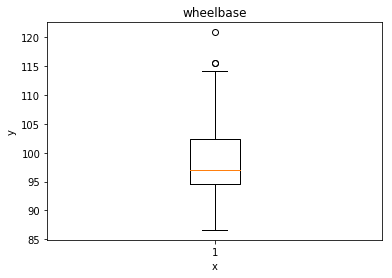

In [2273]:
# Step22 -Scatter Plot against measures (wheelbase). Can observe that there are outliers
colors = (0,0,0)
colors = (0,0,0)
plt.boxplot(car_price.wheelbase)
plt.title('wheelbase')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

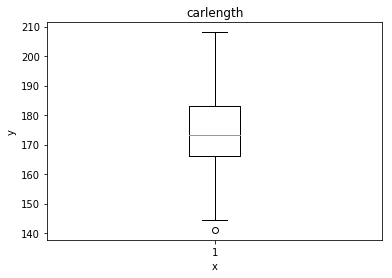

In [2274]:
# Step 23- Scatter Plot against measures (carlength). There are outliers on carlength but on lower end.
plt.boxplot(car_price.carlength)
plt.title('carlength')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

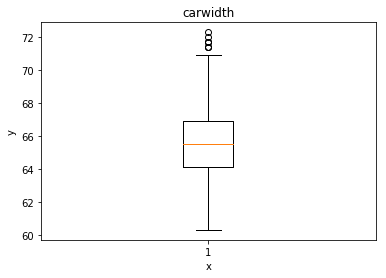

In [2275]:
# Step 24 -Scatter Plot against measures (carwidth). Outliers are found for this variable
colors = (0,0,0)
plt.boxplot(car_price.carwidth)
plt.title('carwidth')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

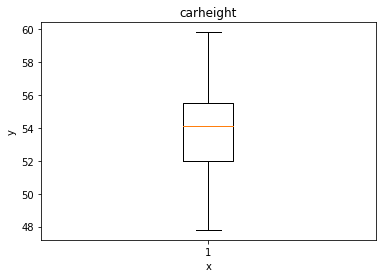

In [2276]:
# Step25 - Scatter Plot against measures (carheight). WE cannot see any outliers.
colors = (0,0,0)
plt.boxplot(car_price.carheight)
plt.title('carheight')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

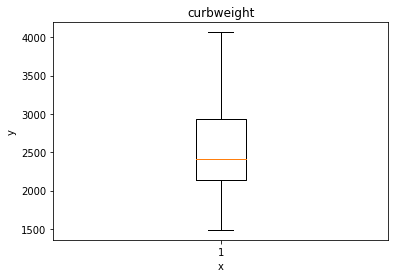

In [2277]:
# Step 26 - Scatter Plot against measures (curbweight). NO ourliers found.
colors = (0,0,0)
plt.boxplot(car_price.curbweight)
plt.title('curbweight')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

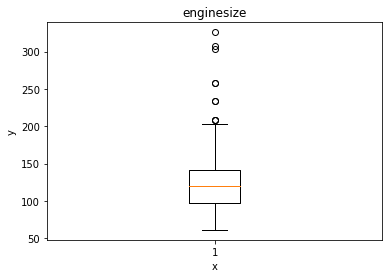

In [2278]:
# Step 27 -Scatter Plot against measures (enginesize). OUtliers found, might need fix.
colors = (0,0,0)
plt.boxplot(car_price.enginesize)
plt.title('enginesize')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

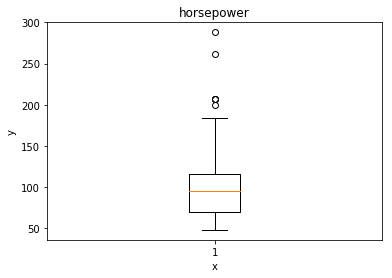

In [2279]:
# Step 28- Scatter Plot against measures (horsepower). Outliers found 
colors = (0,0,0)
plt.boxplot(car_price.horsepower)
plt.title('horsepower')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

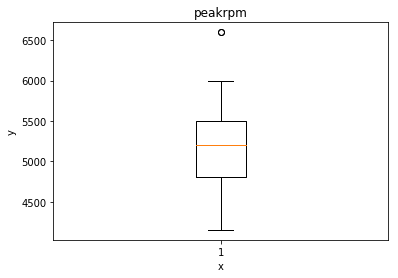

In [2280]:
# Step 29- Scatter Plot against measures (peakrpm). Outliers found, might need correciton.
colors = (0,0,0)
plt.boxplot(car_price.peakrpm)
plt.title('peakrpm')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

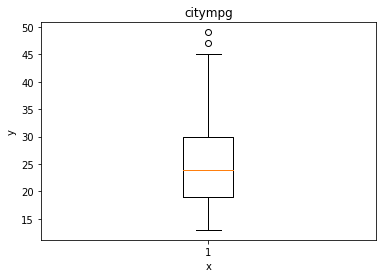

In [2281]:
# Step 30- Scatter Plot against measures (citympg). Outliers found,need fix.
colors = (0,0,0)
plt.boxplot(car_price.citympg)
plt.title('citympg')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

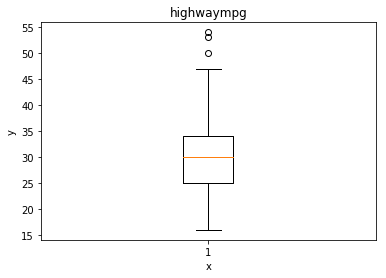

In [2282]:
# Step 31 -Scatter Plot against measures (highwaympg). There are outliers.
colors = (0,0,0)
plt.boxplot(car_price.highwaympg)
plt.title('highwaympg')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

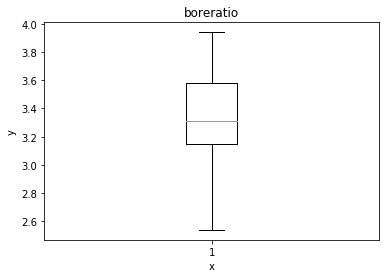

In [2283]:
# Step 32 -Scatter Plot against measures (boreratio). No outliers found.
colors = (0,0,0)
plt.boxplot(car_price.boreratio)
plt.title('boreratio')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

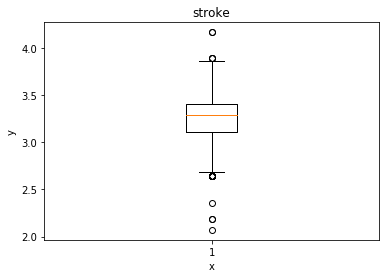

In [2284]:
# Step 33 - Scatter Plot against measures (stroke). There are outliers, need fix.
colors = (0,0,0)
plt.boxplot(car_price.stroke)
plt.title('stroke')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

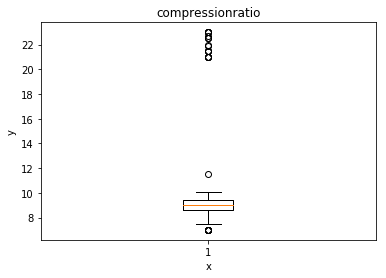

In [2285]:
# Step 34- Scatter Plot against measures (compressionratio). Too many outliers, need a update on data.
colors = (0,0,0)
plt.boxplot(car_price.compressionratio)
plt.title('compressionratio')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2286]:
#Step35 - Data Observation- With reference to above box plots on measures, we could see some outliers in 
#compressionratio,highwaympg,citympg,peakrpm,horsepower,enginesize,carwidth,carlength,wheelbase
car_price[['compressionratio','highwaympg','citympg','peakrpm','horsepower','enginesize','carwidth','carlength','wheelbase']].describe()


,compressionratio,highwaympg,citympg,peakrpm,horsepower,enginesize,carwidth,carlength,wheelbase
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,10.142537,30.751220,25.219512,5125.121951,104.117073,126.907317,65.907805,174.049268,98.756585
std,3.972040,6.886443,6.542142,476.985643,39.544167,41.642693,2.145204,12.337289,6.021776
min,7.000000,16.000000,13.000000,4150.000000,48.000000,61.000000,60.300000,141.100000,86.600000
25%,8.600000,25.000000,19.000000,4800.000000,70.000000,97.000000,64.100000,166.300000,94.500000
50%,9.000000,30.000000,24.000000,5200.000000,95.000000,120.000000,65.500000,173.200000,97.000000
75%,9.400000,34.000000,30.000000,5500.000000,116.000000,141.000000,66.900000,183.100000,102.400000
max,23.000000,54.000000,49.000000,6600.000000,288.000000,326.000000,72.300000,208.100000,120.900000


In [2287]:
#Step 36 - Data correction- Discarding outliers rows from the respective columns, Setting 90th percentile value to any values above 90th percentile
#compressionratio
car_price.loc[car_price.compressionratio > car_price.compressionratio.quantile(0.90),'compressionratio']=car_price.compressionratio.quantile(0.90)
#highwaympg
car_price.loc[car_price.highwaympg > car_price.highwaympg.quantile(0.90),'highwaympg']=car_price.highwaympg.quantile(0.90)
#citympg
car_price.loc[car_price.citympg > car_price.citympg.quantile(0.90),'citympg']=car_price.citympg.quantile(0.90)
#peakrpm
car_price.loc[car_price.peakrpm > car_price.peakrpm.quantile(0.90),'peakrpm']=car_price.peakrpm.quantile(0.90)
#enginesize
car_price.loc[car_price.enginesize > car_price.enginesize.quantile(0.90),'enginesize']=car_price.enginesize.quantile(0.90)
#carwidth
car_price.loc[car_price.carwidth > car_price.carwidth.quantile(0.90),'carwidth']=car_price.carwidth.quantile(0.90)
#carlength
car_price.loc[car_price.carlength > car_price.carlength.quantile(0.90),'carlength']=car_price.carlength.quantile(0.90)
#wheelbase
car_price.loc[car_price.wheelbase > car_price.wheelbase.quantile(0.90),'wheelbase']=car_price.wheelbase.quantile(0.90)
#Step 37 -Data observation - Describe the columns again and observe
car_price[['compressionratio','highwaympg','citympg','peakrpm','horsepower','enginesize','carwidth','carlength','wheelbase']].describe()


,compressionratio,highwaympg,citympg,peakrpm,horsepower,enginesize,carwidth,carlength,wheelbase
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,9.060293,30.165854,24.559024,5105.024390,104.117073,122.965854,65.719220,173.309268,98.364878
std,0.894769,5.761757,5.283110,437.840763,39.544167,30.521831,1.745863,11.026908,5.126779
min,7.000000,16.000000,13.000000,4150.000000,48.000000,61.000000,60.300000,141.100000,86.600000
25%,8.600000,25.000000,19.000000,4800.000000,70.000000,97.000000,64.100000,166.300000,94.500000
50%,9.000000,30.000000,24.000000,5200.000000,95.000000,120.000000,65.500000,173.200000,97.000000
75%,9.400000,34.000000,30.000000,5500.000000,116.000000,141.000000,66.900000,183.100000,102.400000
max,10.940000,38.000000,31.600000,5780.000000,288.000000,181.000000,68.640000,188.800000,107.900000


In [2288]:
#Step 38- Data observation
car_price.shape

(205, 70)

## Build Data Model

First basic step for regression is performing a train-test split.
Secondly, Scale the data using min max scaling framework


In [2289]:
#Step 39- Data Modelling-
from sklearn.model_selection import train_test_split

# Based on the understanding from LR modules, splitting the data as recommended
np.random.seed(0)
car_train, car_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)
#Making a copy of car_test for RFE set if needed
car_test_rfe=car_test.copy()

In [2290]:
#Step 40- Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2291]:
# Apply scaler() to all the columns except the logical and 'dummy' variables, i.e all numeric variables
pd.options.mode.chained_assignment = None
car_price_numeric_variables = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
car_train[car_price_numeric_variables] = scaler.fit_transform(car_train[car_price_numeric_variables])
car_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO,Rating+1,Rating+2,Rating+3,Rating-1,Rating-2,p2w
car_ID,,,,,,,,,,,,,,,,,,,,,
123,0,0,1,0,0.333333,0.549266,0.419664,0.265487,0.272692,0.308333,...,0,0,0,0,1,0,0,0,0,0.03
126,0,0,0,0,0.370892,0.582809,0.959233,0.212389,0.500388,0.750000,...,0,0,0,0,0,0,1,0,0,0.05
167,0,0,0,0,0.370892,0.578616,0.443645,0.424779,0.314973,0.308333,...,0,1,0,0,1,0,0,0,0,0.05
2,0,0,0,0,0.093897,0.580713,0.455635,0.088496,0.411171,0.575000,...,0,0,0,0,0,0,1,0,0,0.04
200,0,1,1,0,0.830986,1.000000,0.827338,0.858407,0.647401,0.575000,...,0,0,0,1,0,0,0,1,0,0.05


In [2292]:
#Step 41 - Observation -Describe Train set for car price
car_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO,Rating+1,Rating+2,Rating+3,Rating-1,Rating-2,p2w
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.090909,0.181818,0.559441,0.006993,0.541876,0.661697,0.641277,0.509004,0.407878,0.503730,...,0.076923,0.139860,0.048951,0.041958,0.300699,0.118881,0.125874,0.090909,0.013986,0.039371
std,0.288490,0.387050,0.498199,0.083624,0.239555,0.236552,0.218179,0.215378,0.211269,0.261322,...,0.267406,0.348061,0.216524,0.201198,0.460174,0.324786,0.332873,0.288490,0.117845,0.009802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,0.000000,0.000000,0.000000,0.000000,0.370892,0.514675,0.437650,0.353982,0.245539,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,0.000000,0.000000,1.000000,0.000000,0.464789,0.647799,0.611511,0.522124,0.355702,0.408333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
75%,0.000000,0.000000,1.000000,0.000000,0.685446,0.863732,0.791367,0.668142,0.559542,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.090000


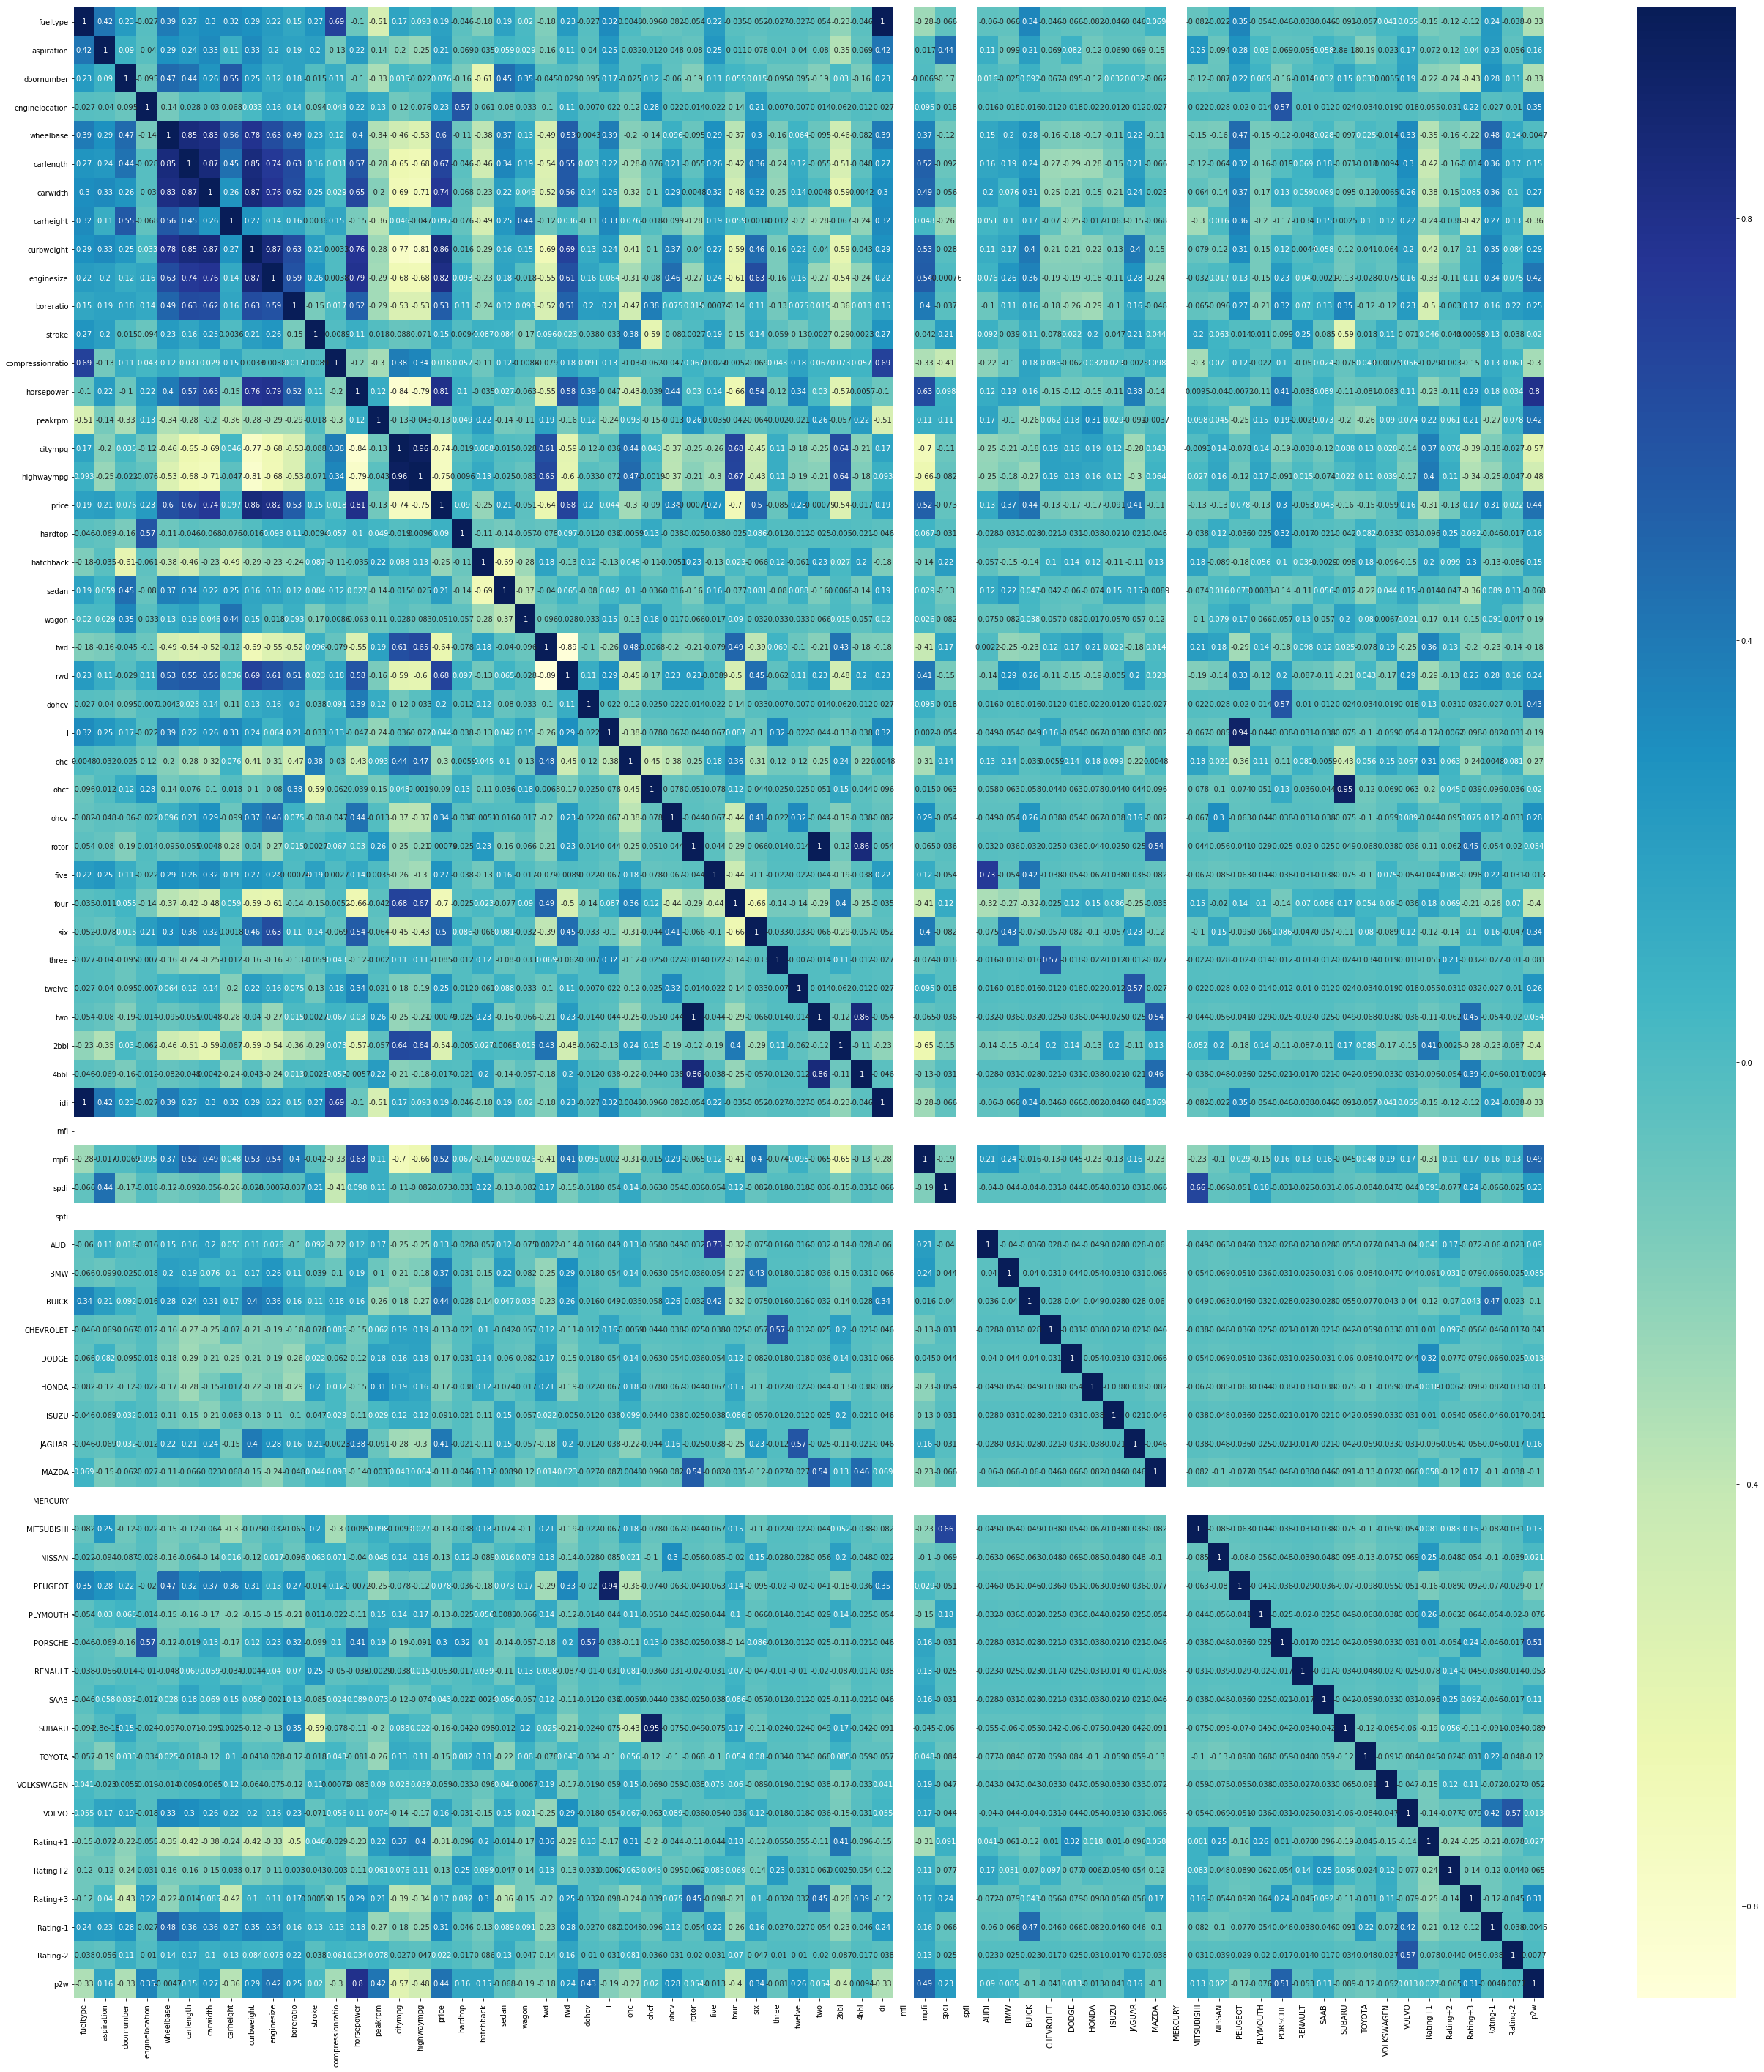

In [2293]:
# Step 42 - Data Visualiation - Let's check the correlation coefficients to see which variables are highly correlated
# Recommended that you save the file as image and view it externally. Zooming in jupyter not doesnt work with browser. Right click to see options
plt.figure(figsize = (45, 50))
sns.heatmap(car_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


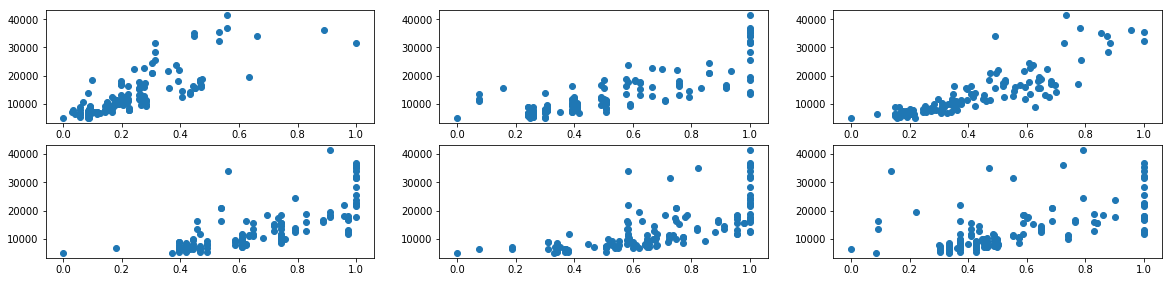

In [2294]:
# Step 43- Data Visualization - We see high correlation with below measures -
# horsepower(0.81), enginesize(0.82), curbweight(0.86),carwidth(0.74),carlength (0.67), wheelbase(0.6) 
#Plotting scatter plot with highest correlated parameter 
plt.figure(figsize=(20, 12))
plt.subplot(5,3,1)
plt.scatter(car_train.horsepower, car_train.price)
plt.subplot(5,3,2)
plt.scatter(car_train.enginesize, car_train.price)
plt.subplot(5,3,3)
plt.scatter(car_train.curbweight, car_train.price)
plt.subplot(5,3,4)
plt.scatter(car_train.carwidth, car_train.price)
plt.subplot(5,3,5)
plt.scatter(car_train.carlength, car_train.price)
plt.subplot(5,3,6)
plt.scatter(car_train.wheelbase, car_train.price)
plt.figure(figsize=[6,6])
plt.show()

In [2295]:
#Step 44 - Dividing into X and Y sets for the model building
y_train = car_train.pop('price')
X_train = car_train

In [2296]:
#Step 45-Building a linear model
import statsmodels.api as sm
from pandas.core import datetools
# Add a constant to the training set
X_train_lm = sm.add_constant(X_train[['curbweight']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [2297]:
# VStep 46-erify the results
lr.params

const            66.067549
curbweight    31848.413865
dtype: float64

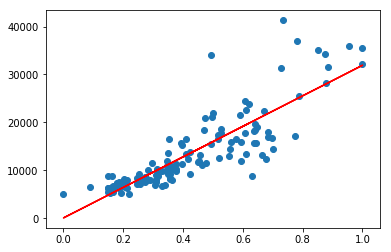

In [2298]:
# Step 47- Data Visualisation -Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 66.06 + 31848.41*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [2299]:
# Step 48- Display the summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     407.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.06e-43
Time:                        18:10:28   Log-Likelihood:                -1387.0
No. Observations:                 143   AIC:                             2778.
Df Residuals:                     141   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.0675    724.426      0.091      0.9

In [2300]:
# Step 49- Repeat model building-Assign Another variable to validate
# horsepower(0.81), enginesize(0.82), curbweight(0.86),carwidth(0.74),carlength (0.67), wheelbase(0.6) 
X_train_lm = X_train[['enginesize','curbweight']]
# Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr2 = sm.OLS(y_train, X_train_lm).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     224.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.00e-44
Time:                        18:10:28   Log-Likelihood:                -1381.3
No. Observations:                 143   AIC:                             2769.
Df Residuals:                     140   BIC:                             2777.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -494.9373    717.824     -0.689      0.4

In [2301]:
# Step 50 - Repeat model building- Assign Another variable to validate - enginesize, curbweight, horsepower
# horsepower(0.81), enginesize(0.82), curbweight(0.86),carwidth(0.74),carlength (0.67), wheelbase(0.6) 
X_train_lm = X_train[['enginesize','curbweight','horsepower']]
# Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr3 = sm.OLS(y_train, X_train_lm).fit()

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.41e-48
Time:                        18:10:28   Log-Likelihood:                -1369.1
No. Observations:                 143   AIC:                             2746.
Df Residuals:                     139   BIC:                             2758.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.6267    670.743      0.108      0.9

In [2302]:
# Step 51- Assign all the feature variables to X
# horsepower(0.81), enginesize(0.82), curbweight(0.86),carwidth(0.74),carlength (0.67), wheelbase(0.6) 
X_train_lm = X_train[['horsepower', 'enginesize','curbweight','carwidth','carlength','wheelbase']]

In [2303]:
# Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr4 = sm.OLS(y_train, X_train_lm).fit()

lr4.params

/home/gladiator/anaconda/lib/python3.6/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


const          1234.280539
horsepower    15220.264398
enginesize     3961.656448
curbweight    21959.336198
carwidth        652.915665
carlength     -7286.651189
wheelbase      3345.754197
dtype: float64

In [2304]:
# Step 53-Check the summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     95.48
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.77e-46
Time:                        18:10:29   Log-Likelihood:                -1366.0
No. Observations:                 143   AIC:                             2746.
Df Residuals:                     136   BIC:                             2767.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1234.2805   1058.455      1.166      0.2

In [2305]:
#Step54 -Ignoring carwidth and rerunning the model-5th model
X_train_lm = X_train[['horsepower', 'enginesize','curbweight','carlength','wheelbase']]
# Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr5 = sm.OLS(y_train, X_train_lm).fit()

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     115.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.49e-47
Time:                        18:10:29   Log-Likelihood:                -1366.1
No. Observations:                 143   AIC:                             2744.
Df Residuals:                     137   BIC:                             2762.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1334.7750    919.232      1.452      0.1

In [2306]:
#Step 55- Ignoring carwidth and rerunning the model- 6th Model
X_train_lm = X_train[['horsepower', 'enginesize','curbweight','carlength',]]
# Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr6 = sm.OLS(y_train, X_train_lm).fit()

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     143.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.70e-48
Time:                        18:10:29   Log-Likelihood:                -1367.0
No. Observations:                 143   AIC:                             2744.
Df Residuals:                     138   BIC:                             2759.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1372.8353    921.385      1.490      0.1

In [2307]:
car_price.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'AUDI', 'BMW', 'BUICK', 'CHEVROLET',
       'DODGE', 'HONDA', 'ISUZU', 'JAGUAR', 'MAZDA', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'Rating+1', 'Rating+2', 'Rating+3',
       'Rating-1', 'Rating-2', 'p2w'],
      dtype='object')

In [2308]:
#Step 56 -7th Model- Including all variables in the dataframe
#Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr7 = sm.OLS(y_train, X_train_lm).fit()

lr7.params

const               1.757916e+04
fueltype            9.620502e+01
aspiration         -1.800231e+02
doornumber          2.020994e+02
enginelocation      1.299505e+04
wheelbase           5.576868e+03
carlength          -1.140767e+04
carwidth            9.943859e+03
carheight          -3.846262e+03
curbweight          1.955884e+04
enginesize         -9.096647e+03
boreratio           8.354794e+03
stroke              3.578165e+02
compressionratio   -1.012817e+03
horsepower          1.478855e+04
peakrpm             1.919028e+03
citympg             3.880021e+03
highwaympg         -1.743293e+03
hardtop            -1.768732e+03
hatchback          -1.945936e+03
sedan              -6.438708e+02
wagon              -6.881181e+02
fwd                 4.717043e+02
rwd                 5.101934e+02
dohcv              -9.477402e+03
l                  -4.002267e+03
ohc                 2.439835e+03
ohcf                2.460204e+03
ohcv               -1.434006e+03
rotor              -4.541210e+03
          

In [2309]:
#Step 57 -Printing summary of 7th Model
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     41.30
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.05e-42
Time:                        18:10:29   Log-Likelihood:                -1234.1
No. Observations:                 143   AIC:                             2594.
Df Residuals:                      80   BIC:                             2781.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.758e+04   6975.657  

There are too many columns with higher p-values, we can drop them to rebuild the model. 
As suggesting in upgrad sessions, we can take VIF method to review further

### Checking VIF

### $ VIF_i = \frac{1}{1 - {R_i}^2} $  
###### Taking reference from upgrad sessions

In [2310]:
# Step 58 - Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gladiator/anaconda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/gladiator/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1388: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
0,fueltype,inf
59,SUBARU,inf
3,enginelocation,inf
54,PEUGEOT,inf
37,idi,inf
34,two,inf
32,three,inf
28,rotor,inf
26,ohcf,inf
24,l,inf


In [2311]:
#Step 59 -Dropping NAN and high VIF variables
X = X_train.drop(['MERCURY','spfi','mfi','enginesize','boreratio','citympg','four','horsepower',
                  'carwidth','highwaympg','curbweight','wheelbase','stroke','compressionratio',
                 'mpfi'],axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gladiator/anaconda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,fueltype,inf
14,l,inf
44,SUBARU,inf
3,enginelocation,inf
39,PEUGEOT,inf
26,idi,inf
23,two,inf
21,three,inf
18,rotor,inf
16,ohcf,inf


In [2312]:
# Step 60- Build a 8th fitted model
X_train_lm = sm.add_constant(X)

lr8= sm.OLS(y_train, X_train_lm).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     25.94
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.12e-37
Time:                        18:10:31   Log-Likelihood:                -1290.0
No. Observations:                 143   AIC:                             2682.
Df Residuals:                      92   BIC:                             2833.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2970.0165   3920.983      0.

In [2313]:
#Step 61 - There are about another 20-25 models derived while removing the VIF, 
# but not included here. Jupyter file has gone big and has difficult as we progress.
# Tried with Adding all numeric and dummy variables - R2 - 0.579
# Removed High VIF above 5 and rebuilt the model - R2 - 0.670
# Generated p2w metric and tried again by removing pvalues on higher range - R2 >0.85
# Dropping high VIF variables again and getting vif
X = X_train.drop(['sedan','ohc','hatchback','carheight','peakrpm','rwd','wagon',
                  'fwd','doornumber','six','2bbl','five',
                 'Rating+3','spfi','mfi','boreratio','four','VOLVO','RENAULT',
                  'wheelbase','stroke','compressionratio','spdi','twelve',
                 'mpfi','fueltype','enginelocation','SUBARU','l','PEUGEOT','rotor','three','two','idi','4bbl'
                  ,'horsepower','curbweight','enginesize','carlength','highwaympg','citympg','carwidth',
                  'MERCURY','Rating-2','p2w'],axis=1)

# 'horsepower','curbweight','enginesize','carlength' are key
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,Rating+1,2.51
17,PORSCHE,1.91
2,dohcv,1.69
23,Rating-1,1.68
15,NISSAN,1.63
22,Rating+2,1.61
0,aspiration,1.55
7,BUICK,1.51
1,hardtop,1.43
9,DODGE,1.40


In [2314]:
# Step85- Build a 9th fitted model
X_train_lm = sm.add_constant(X)

lr9= sm.OLS(y_train, X_train_lm).fit()
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     33.26
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.49e-41
Time:                        18:10:31   Log-Likelihood:                -1337.5
No. Observations:                 143   AIC:                             2725.
Df Residuals:                     118   BIC:                             2799.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.357e+04    829.125     16.363      0.0

In [2315]:
#Step 86 -Dropping high VIF variables again and getting vif
# Try1 - Removed Dohcv, Removed SAAB, added P2w - all values fall in place but VIF for p2w >5, hence removing
# Try 2- Removed Dohcv, Removed SAAB, removed P2w - pvalues are small, vif values are within 5

X = X_train.drop(['sedan','ohc','hatchback','carheight','peakrpm','rwd','wagon',
                  'fwd','doornumber','six','2bbl','five',
                 'Rating+3','spfi','mfi','boreratio','four','VOLVO','RENAULT','SAAB','dohcv',
                  'wheelbase','stroke','compressionratio','spdi','twelve',
                 'mpfi','fueltype','SUBARU','l','PEUGEOT','rotor','three','two','idi','4bbl'
                  ,'curbweight','enginesize','carlength','highwaympg','citympg',
                  'MERCURY','Rating-2','p2w','horsepower','enginelocation','carwidth'],axis=1)

# 'horsepower','curbweight','enginesize','carlength' are key
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Rating+1,2.42
21,Rating-1,1.68
14,NISSAN,1.62
6,BUICK,1.51
0,aspiration,1.49
20,Rating+2,1.39
8,DODGE,1.38
3,ohcv,1.36
13,MITSUBISHI,1.34
1,hardtop,1.34


In [2316]:
# Step 90-Build a 10th fitted model
X_train_lm = sm.add_constant(X)

lr10= sm.OLS(y_train, X_train_lm).fit()
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     35.23
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.23e-42
Time:                        18:10:31   Log-Likelihood:                -1340.4
No. Observations:                 143   AIC:                             2727.
Df Residuals:                     120   BIC:                             2795.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.397e+04    803.206     17.388      0.0

In [2317]:
#Step 91 - Recomparing with core measures that were used in model5 to see any correlation
#Try1 - Adding horsepower, enginelocation, carwidth - R2/AdjustedR2 >0.95 but VIFs are going out of range
#Try2 - Removing ISUZU, hardtop,ohcv -- Fstats increased, r2/adjusted -are in .930/0.918
#Try3 - Removed aspiration, CHEVROLET - No change in metrics
#Try4 - Removing VOLKSWAGEN -No major changes in metric
#Try5 - Removing Rating+1, Rating+2, Rating-1 as the pvalues are in >0.2 - hoursepower vif>5, r2/adjusted - 0.927/0.918
#Try6- Removed AUDI, MAZDA,PLYMOUTH,ohcf,NISSAN -- VIF still highers for horsepower, r2/adjusted - 0.918/0.190, fstat>145
#Try7 - Removing TOYOTA,HONDA,MITSUBISHI,horsepower,carwidth - adding p2w - leads to drastic decrease in the R2/adjusted - fell back to 0.70
#Try8 - Remove enginelocation,adding porche add curbweight. - R2/adjusted improved but VIF values are higher for curbweight,p2w
#Try9 - Remvoe curbweight, add carwidth - VIF higher for p2w/Car width, improved R2/Adjuted values >.808
#Try10 -Comparing model5 and starting over - adding 'enginesize','carlength', remove p2w, VIF values are higher
#Try 11 - Adding horsepower, removing enginesize, carlength, adding carwidth,remove p2w, remove porche - r2/adusted - 0.883/0.878
#Try 12 - added volkswagen - r2/adusted reduced with increase in pvalue, so cancelling this approach
#Try 13 - Removed volkswagen, removed buick - Reduction in r2/adjusted - 0.807/0.801
#Try 14/15 - Adding Buick, adding 'rwd',enginelocation- VIFs are near 5-7- r2/adjusted =0.913/0.909 are the closest, Fstats are good, 
# No pvalues out of limit, VIFs can be considered as the measures seems important.
#Try 16 - added 'dohcv', removed horsepower  - R2/adjusted-0.884/0.878, VIF <5, pvalues in range
X = X_train.drop(['ohc','carheight','peakrpm','wagon',
                  'fwd','doornumber','six','2bbl','five','ohcv','aspiration',
                 'Rating+3','spfi','mfi','boreratio','four','VOLVO','RENAULT','SAAB',
                  'wheelbase','stroke','compressionratio','spdi','twelve','ohcf',
                 'mpfi','fueltype','SUBARU','l','PEUGEOT','three','two','idi','4bbl'
                  ,'highwaympg','citympg','MAZDA','PORSCHE',
                  'MERCURY','Rating-2','ISUZU','hardtop','CHEVROLET','VOLKSWAGEN',
                 'Rating+1','Rating+2','PLYMOUTH','AUDI','NISSAN','DODGE','TOYOTA',
                  'HONDA','MITSUBISHI','p2w','curbweight','enginesize','carlength','Rating-1','sedan','hatchback'
                 ,'horsepower','rotor'],axis=1)

# 'horsepower','curbweight','enginesize','carlength' are key
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,rwd,2.40
1,carwidth,2.01
4,BMW,1.18
5,BUICK,1.15
6,JAGUAR,1.09
0,enginelocation,1.03
3,dohcv,1.03


In [2318]:
# Step 107- Build a 11th fitted model
X_train_lm = sm.add_constant(X)

lr11= sm.OLS(y_train, X_train_lm).fit()
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     148.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.45e-60
Time:                        18:10:32   Log-Likelihood:                -1329.4
No. Observations:                 143   AIC:                             2675.
Df Residuals:                     135   BIC:                             2699.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.2662    784.817      0.

Text(0.5,0,'Errors')

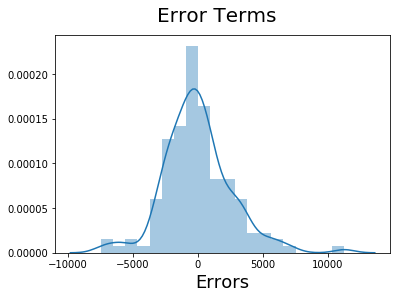

In [2319]:
#Step 108- Marking Predictions using final model- Residual Analysis of train data
y_train_price = lr11.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [2320]:
# Step 109- Making predictions using the final model- Lr11 with 7 variables which were arrived at.
pd.options.mode.chained_assignment = None
car_test_vars = ['dohcv','carwidth','rwd','JAGUAR','BMW','BUICK','enginelocation']
car_test[car_test_vars] = scaler.fit_transform(car_test[car_test_vars])

In [2321]:
#Step 110-Data Analysis -
car_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO,Rating+1,Rating+2,Rating+3,Rating-1,Rating-2,p2w
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.112903,0.177419,0.564516,0.032258,98.879032,174.800000,0.550961,54.124194,2592.596774,126.467742,...,0.016129,0.193548,0.080645,0.080645,0.177419,0.241935,0.145161,0.145161,0.016129,0.040645
std,0.319058,0.385142,0.499868,0.178127,5.187189,10.345031,0.254762,2.438670,462.719100,28.433251,...,0.127000,0.398304,0.274512,0.274512,0.385142,0.431751,0.355139,0.355139,0.127000,0.011433
min,0.000000,0.000000,0.000000,0.000000,86.600000,144.600000,0.000000,49.400000,1819.000000,79.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,0.000000,0.000000,0.000000,0.000000,95.700000,169.350000,0.342020,52.150000,2275.000000,108.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,0.000000,0.000000,1.000000,0.000000,97.850000,174.800000,0.504886,54.450000,2535.000000,121.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
75%,0.000000,0.000000,1.000000,0.000000,103.150000,185.375000,0.651466,55.700000,2944.250000,144.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
max,1.000000,1.000000,1.000000,1.000000,107.900000,188.800000,1.000000,59.800000,3900.000000,181.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.080000


In [2322]:
#Step 111-Dividing into X_test and y_test - for model 11
y_test = car_test.pop('price')
X_test = car_test
# Adding constant variable to test dataframe
X_test_m11 = sm.add_constant(X_test)
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m11 = X_test_m11.drop(['ohc','carheight','peakrpm','wagon',
                  'fwd','doornumber','six','2bbl','five','ohcv','aspiration',
                 'Rating+3','spfi','mfi','boreratio','four','VOLVO','RENAULT','SAAB',
                  'wheelbase','stroke','compressionratio','spdi','twelve','ohcf',
                 'mpfi','fueltype','SUBARU','l','PEUGEOT','three','two','idi','4bbl'
                  ,'highwaympg','citympg','MAZDA','PORSCHE',
                  'MERCURY','Rating-2','ISUZU','hardtop','CHEVROLET','VOLKSWAGEN',
                 'Rating+1','Rating+2','PLYMOUTH','AUDI','NISSAN','DODGE','TOYOTA',
                  'HONDA','MITSUBISHI','p2w','curbweight','enginesize','carlength','Rating-1','sedan','hatchback'
                 ,'horsepower','rotor'], axis = 1)
# Making predictions using the 11th model

y_pred_m11 = lr11.predict(X_test_m11)

#### Model Evaluation


Text(0,0.5,'y_pred')

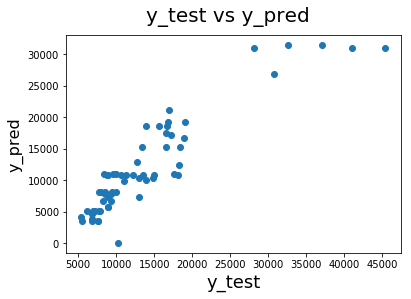

In [2323]:
# Step 112-Plotting y_test and y_pred to understand the spread - Model 11
fig = plt.figure()
plt.scatter(y_test, y_pred_m11)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [2324]:
#Step 113-view parameters
lr11.params

const                12.266217
enginelocation    22089.043318
carwidth          16619.630157
rwd                2560.711840
dohcv             12207.891786
BMW               12334.668409
BUICK             11735.391786
JAGUAR            15407.391786
dtype: float64

In [2325]:
#Step 114 - As requested in the problem, usig sklearn to derice r2 metrics
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m11)

0.7854285009282281

### Conclusion 
We can conclude that there are multple combinations to predict prices. Above model shows linearity with test data agaist trained set.
 1. Variables identified that impacts the pricing in this model are - enginelocation, carwidth,rwd,dohcv,BMW,BUICK,JAGUAR
 2. R2 score Train- R-squared: 0.885  Adj. R-squared: 0.879
 3. R2 score Test - 0.79
 
Additionally we can use RFE to get the primary impacting variable. We can build an alternative model.

#### Additional Step - Building it thorugh RFE (Recursive Feature Elimination)

Trying to use RFE as additional exercise. Referred upgrad examples during LR classes.

In [2326]:
# Step 115-Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2327]:
# Step 116- Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [2328]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 50),
 ('aspiration', False, 55),
 ('doornumber', False, 56),
 ('enginelocation', True, 1),
 ('wheelbase', False, 12),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', False, 6),
 ('boreratio', False, 8),
 ('stroke', False, 47),
 ('compressionratio', False, 53),
 ('horsepower', True, 1),
 ('peakrpm', False, 32),
 ('citympg', True, 1),
 ('highwaympg', False, 36),
 ('hardtop', False, 41),
 ('hatchback', False, 37),
 ('sedan', False, 46),
 ('wagon', False, 45),
 ('fwd', False, 43),
 ('rwd', False, 44),
 ('dohcv', True, 1),
 ('l', False, 5),
 ('ohc', False, 30),
 ('ohcf', False, 10),
 ('ohcv', False, 42),
 ('rotor', False, 7),
 ('five', False, 4),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 48),
 ('twelve', False, 2),
 ('two', False, 3),
 ('2bbl', False, 35),
 ('4bbl', False, 31),
 ('idi', False, 60),
 ('mfi', False, 49),
 ('mpfi', False, 33),
 ('spdi', False, 34),
 ('spfi', False, 54),
 (

In [2329]:
#Step 117 - Collumns in scope
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carlength', 'carwidth', 'curbweight', 'horsepower',
       'citympg', 'dohcv', 'four', 'six', 'BMW'],
      dtype='object')

In [2330]:
#Step 118 - Removing columns that are not significant
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carheight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'three', 'twelve', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'AUDI', 'BUICK',
       'CHEVROLET', 'DODGE', 'HONDA', 'ISUZU', 'JAGUAR', 'MAZDA', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT',
       'SAAB', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'Rating+1',
       'Rating+2', 'Rating+3', 'Rating-1', 'Rating-2', 'p2w'],
      dtype='object')

In [2331]:
# Step 119 -Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [2332]:
# Step 120- Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [2333]:
 #Step 120b- Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [2334]:
#Step 121-Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.13e-63
Time:                        18:10:34   Log-Likelihood:                -1314.2
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     132   BIC:                             2683.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -859.3093   1909.092     -0.

In [2335]:
#Step 122- Dropping dohcv as high pvalue
X_train_new = X_train_rfe.drop(["dohcv"], axis = 1)

In [2336]:
# Step 123 -Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [2337]:
# Step 124 -Running the linear model again
lm = sm.OLS(y_train,X_train_lm).fit()   

In [2338]:
#Step 125-Print summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     141.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.19e-63
Time:                        18:10:34   Log-Likelihood:                -1315.4
No. Observations:                 143   AIC:                             2651.
Df Residuals:                     133   BIC:                             2680.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            126.8220   1792.407      0.

In [2339]:
#Step 126- Columns in scope for retry
X_train_new.columns

Index(['const', 'enginelocation', 'carlength', 'carwidth', 'curbweight',
       'horsepower', 'citympg', 'four', 'six', 'BMW'],
      dtype='object')

In [2340]:
#Step 127-131 - Dropping listed columns one by one and re running the training set until we get better VIF
X_train_new = X_train_new.drop(['const','curbweight','carwidth','carlength','four'], axis=1)

In [2341]:
# Step 132 - Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,2.21
3,six,1.96
2,citympg,1.48
4,BMW,1.30
0,enginelocation,1.08


Text(0.5,0,'Errors')

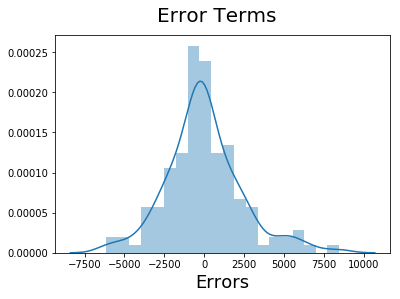

In [2342]:
#Step 133- Residual Analysis of the train data
y_train_price = lm.predict(X_train_lm)
#Step 134 -Visualise
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Additional Conclusion -
Alternatively model using RFE shows horsepower, cylindernumber, city mileage, BMW and engine location are significant variables in deciding car prices